# Pandas and Visualization Lab Exercises

## Pandas

### Exercise 1

Create a `DataFrame` which has two columns: `Item` and `Price`. The `DataFrame` should have three rows. In the first row, `Item` should be `apple` and price should be `0.75`, and the second row `Item` should be `banana` and price should be `0.42`, and in the third row, `Item` should be `pear` and price should be `0.84`.

In [1]:
import pandas as pd


df = pd.DataFrame({"Item": ["apple", "banana", "pear"], "Price": [0.75, 0.42, 0.84]})
df

,Item,Price
0,apple,0.75
1,banana,0.42
2,pear,0.84


### Exercise 2

Using the `DataFrame` from exercise 1, print the min, max, and standard deviation of prices.

In [15]:
print(df.min(), "\n")
print(df.max(), "\n")
print(df.std(axis=0))

Item     apple
Price     0.42
dtype: object 

Item     pear
Price    0.84
dtype: object 

Price    0.221133
dtype: float64


/var/folders/b1/8ygvz1891pb28243s84n4sxm0000gn/T/ipykernel_16539/3650006952.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std(axis=0))


### Exercise 3

Using the `DataFrame` from exercise 1, add a new `Quantity` column which is `10` for `apple`, `30` for `banana`, and `5` for `pear`. Then construct a `Revenue` variable as price multiplied by quantity.  

In [16]:
df["Quantity"] = [10, 30, 5]
df["Revenue"] = df["Price"] * df["Quantity"]

df

,Item,Price,Quantity,Revenue
0,apple,0.75,10,7.5
1,banana,0.42,30,12.6
2,pear,0.84,5,4.2


### Exercise 4

From the same `DataFrame`, select the `Item` whose `Quantity` is `30`. Answer should be just `banana` and not the entire row containing `banana`.

In [21]:
df[df["Quantity"] == 30]["Item"]

1    banana
Name: Item, dtype: object

## Pandas Styling

### Exercise 1

Continue using the `DataFrame` from the first section. Highlight the minimum value in each of the columns.

In [26]:
df.style.highlight_min(axis=0, props='background-color:red;', subset=['Price','Quantity', "Revenue"])

,Item,Price,Quantity,Revenue
0,apple,0.750000,10,7.500000
1,banana,0.420000,30,12.600000
2,pear,0.840000,5,4.200000


### Exercise 2

Continue with the same `DataFrame`. Give the `DataFrame` a new background color and text color, whichever colors you prefer.

In [27]:
df.style.set_properties(**{'background-color': 'black',
                           'color': 'green'})

,Item,Price,Quantity,Revenue
0,apple,0.750000,10,7.500000
1,banana,0.420000,30,12.600000
2,pear,0.840000,5,4.200000


### Exercise 3

With the same `DataFrame`, highlight any values which are less than or equal to 5.

In [31]:
df.style.apply(lambda x: ["background: green" if v <= 5 else "" for v in x], axis = 0, subset=['Price','Quantity', "Revenue"])

,Item,Price,Quantity,Revenue
0,apple,0.750000,10,7.500000
1,banana,0.420000,30,12.600000
2,pear,0.840000,5,4.200000


### Exercise 4

Create light green bar graphs inside the `Quantity` column only.

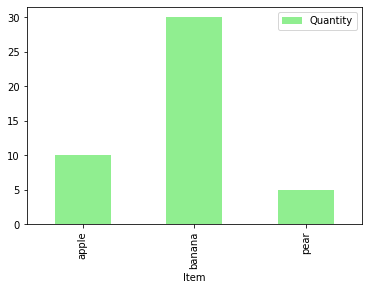

In [42]:
ax = df.plot.bar(x="Item", y='Quantity', color="lightgreen")

## Graphics

### Exercise 1

Using the prior `DataFrame`, create a scatter plot of price versus quantity. 

<AxesSubplot:xlabel='Price', ylabel='Quantity'>

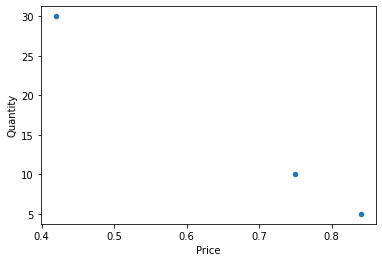

In [44]:
df.plot(kind='scatter', x="Price", y="Quantity")

### Exercise 2

Still using the prior `DataFrame`, create a box and whisker plot showing the distribution of `Revenue`.

<AxesSubplot:>

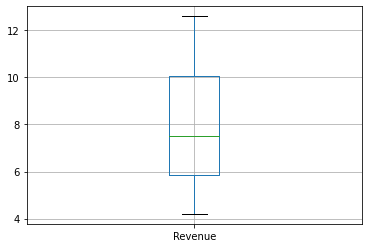

In [45]:
df.boxplot(column='Revenue')

### Exercise 3

Construct a new `DataFrame` using the fruits values. The number given in the tuple represents the quantity of the fruit. Form a pie chart representing the frequency of the fruits. Form histogram and density plots representing the distribution of the quantities.

<AxesSubplot:ylabel='Quantity'>

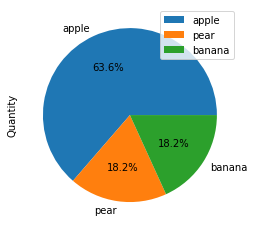

In [58]:
fruits = [
    ('apple', 7),
    ('pear', 2),
    ('banana', 2),
]
df = pd.DataFrame(fruits, columns =['Fruit', 'Quantity']).set_index("Fruit")
df.plot.pie(y="Quantity", autopct='%1.1f%%')